# Particle Densities
We have
$
\langle n_{i,\uparrow}^\infty \rangle = \frac{1}{2} (1 - iG_K(i,\uparrow,\infty;i,\uparrow,\infty))\\
\langle n_{i,\downarrow}^\infty \rangle = \frac{1}{2} (1 - iG_K(i,\downarrow,\infty;i,\downarrow,\infty))\\
\langle S^- \rangle = \frac{-i}{2} G_K(i, \uparrow, \infty; i, \downarrow, \infty)\\
\langle S^+ \rangle = \frac{-i}{2} G_K(i, \downarrow, \infty; i, \uparrow, \infty)\\
$

In [1]:
%cd "/home/aditya/Documents/SOMBL"
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scripts.plot_utils as putils

/home/aditya/Documents/SOMBL


In [2]:
%config InlineBackend.figure_format = 'svg'

In [17]:
totalbins = 0
kwargs = {
    "size": 100,
    "coupling": 0.2,
    "disorder": 18,
    "hopup": 1.0,
    "hopdn": 1.0,
    "runs": 100,
    "nospin": False,
    "binnum": -1,
    "alpha": 0,
    "beta": 0
}

prefix = "data/mbl_density"
pattern = "alt_up_down"

In [18]:
def convert_to_2d(array, length):
    matrix = np.empty((length, length), dtype=array.dtype)
    for x in range(length):
        for y in range(length):
            matrix[x, y] = array[x + y*length]
    return matrix

In [19]:
def get_final_densities(GR_GRstar, binnum):
    n_up = 0.5 * (1 - GR_GRstar[0, 0, binnum])
    n_down = 0.5 * (1 - GR_GRstar[1, 1, binnum])
    S_plus = -0.5 * GR_GRstar[1, 0, binnum]
    S_minus = -0.5 * GR_GRstar[0, 1, binnum]
    return (n_up, n_down, S_plus, S_minus)

In [20]:
GR_GRstar = np.empty((2,2,totalbins+1), dtype=object)
for alpha in range(2):
    for beta in range(2):
        kwargs["alpha"] = alpha
        kwargs["beta"] = beta
        kwargs["binnum"] = -1
        params = putils.SystemParams(**kwargs)
        filename = putils.getFilename(params, endname=f"_{pattern}.dat", prefix=prefix)
        # print(filename)
        if(alpha == beta):
            GR_GRstar[alpha, beta, totalbins] = convert_to_2d(np.loadtxt(filename), params.size)
        else: #(alpha != beta)
            GR_GRstar[alpha, beta, totalbins] = convert_to_2d(np.loadtxt(filename, dtype=complex), params.size)

        for binnum in range(totalbins):
            kwargs["alpha"] = alpha
            kwargs["beta"] = beta
            kwargs["binnum"] = binnum
            params = putils.SystemParams(**kwargs)
            filename = putils.getFilename(params, endname=f"_{pattern}.dat", prefix=prefix)
            # print(filename)
            if(alpha == beta):
                GR_GRstar[alpha, beta, binnum] = convert_to_2d(np.loadtxt(filename), params.size)
            else: #(alpha != beta)
                GR_GRstar[alpha, beta, binnum] = convert_to_2d(np.loadtxt(filename, dtype=complex), params.size)


In [21]:
colorbar_kwargs = {
    "location": "right",
    "fraction": 0.046,
    "pad": 0.04,
    "format": "%.2e"
}

In [22]:
def plot_set(densities, title="", colorbar_kwargs={}):
    n_up, n_down, S_plus, S_minus = densities
    figures = []
    
    # Plot n_up and n_down
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4.5))
    figures.append(fig)
    fig.suptitle(title)
    
    ax = axes[0]
    ax.set_title(r"$\langle n_{\uparrow} \rangle$")
    mappable = ax.imshow(n_up, origin="lower")
    fig.colorbar(mappable, ax=ax, **colorbar_kwargs)

    ax = axes[1]
    ax.set_title(r"$\langle n_{\downarrow} \rangle$")
    mappable = ax.imshow(n_down, origin="lower")
    fig.colorbar(mappable, ax=ax, **colorbar_kwargs)

    fig.tight_layout()
    
    # Plot S_plus and S_minus
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 4.5))
    figures.append(fig)
    fig.suptitle(title)
    
    ax = axes[0, 0]
    ax.set_title(r"$|\langle S^+ \rangle|$")
    mappable = ax.imshow(np.abs(S_plus), origin="lower", cmap="RdBu")
    fig.colorbar(mappable, ax=ax, **colorbar_kwargs)

    ax = axes[0, 1]
    ax.set_title(r"$|\langle S^- \rangle|$")
    mappable = ax.imshow(np.abs(S_minus), origin="lower", cmap="RdBu")
    fig.colorbar(mappable, ax=ax, **colorbar_kwargs)

    ax = axes[1, 0]
    ax.set_title(r"$\theta [\langle S^+ \rangle]$")
    mappable = ax.imshow(np.angle(S_plus), origin="lower", cmap="RdBu")
    fig.colorbar(mappable, ax=ax, **colorbar_kwargs)

    ax = axes[1, 1]
    ax.set_title(r"$\theta [\langle S^- \rangle]$")
    mappable = ax.imshow(np.angle(S_minus), origin="lower", cmap="RdBu")
    fig.colorbar(mappable, ax=ax, **colorbar_kwargs)

    fig.tight_layout()
    return figures

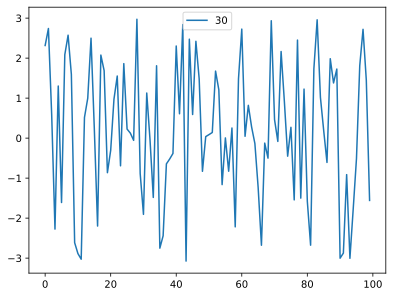

In [23]:
n_up, n_down, S_plus, S_minus = densities

# ax.set_title(r"$|\langle S^+ \rangle|$")
# mappable = plt.imshow(n_up[30:35, :], origin="lower", cmap="RdBu")
# plt.colorbar(mappable, **colorbar_kwargs)
for i in range(30, 31):
    plt.plot(np.angle(S_plus[i, :]), label=f"{i}")
    plt.legend()

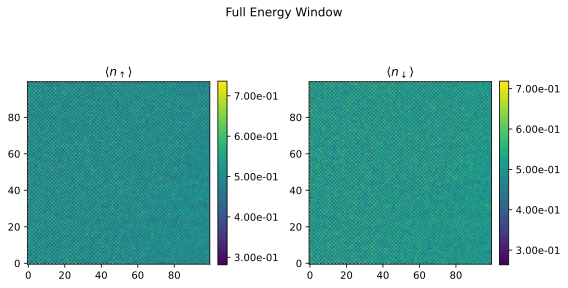

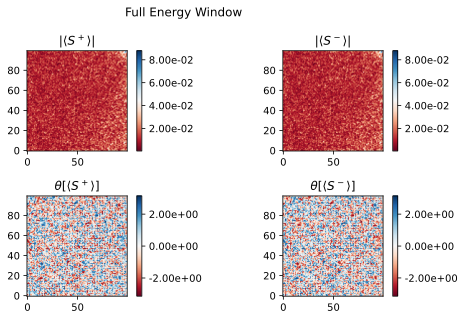

In [24]:
densities = get_final_densities(GR_GRstar, totalbins)
fig1, fig2 = plot_set(densities, title="Full Energy Window", colorbar_kwargs=colorbar_kwargs)

In [23]:
for binnum in range(totalbins):
    densities = get_final_densities(GR_GRstar, binnum)
    fig1, fig2 = plot_set(densities, title=f"Bin {binnum}", colorbar_kwargs=colorbar_kwargs)
    params.alpha = params.beta = None
    params.binnum = binnum
    fname1 = putils.getFilename(params, endname=f"_{pattern}_n_updown", prefix="mbl_densities")
    fig1.savefig("plots/PDFs/"+fname1+".pdf")
    fig1.savefig("plots/PNGs/"+fname1+".png")
    fname2 = putils.getFilename(params, endname=f"_{pattern}_S_plusminus", prefix="mbl_densities")
    fig2.savefig("plots/PDFs/"+fname1+".pdf")
    fig2.savefig("plots/PNGs/"+fname1+".png")
    plt.close(fig1)
    plt.close(fig2)
    
densities = get_final_densities(GR_GRstar, totalbins)
fig1, fig2 = plot_set(densities, title="Full Energy Window", colorbar_kwargs=colorbar_kwargs)
params.alpha = params.beta = None
params.binnum = -1
fname1 = putils.getFilename(params, endname=f"_{pattern}_n_updown", prefix="mbl_densities")
fig1.savefig("plots/PDFs/"+fname1+".pdf")
fig1.savefig("plots/PNGs/"+fname1+".png")
fname2 = putils.getFilename(params, endname=f"_{pattern}_S_plusminus", prefix="mbl_densities")
fig2.savefig("plots/PDFs/"+fname1+".pdf")
fig2.savefig("plots/PNGs/"+fname1+".png")
plt.close(fig1)
plt.close(fig2)


1.0000000000487


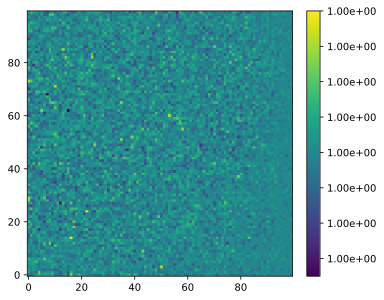

In [25]:
densities = get_final_densities(GR_GRstar, totalbins)
n_up, n_down, S_plus, S_minus = densities
plt.imshow(n_up+n_down, origin="lower")
plt.colorbar(**colorbar_kwargs)
print(np.sum(n_up+n_down)/(kwargs["size"]**2))

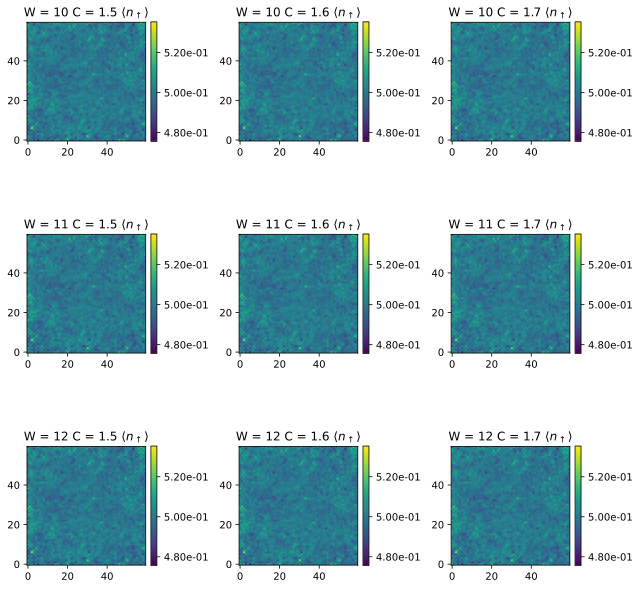

In [25]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
for i, w in enumerate([10, 11, 12]):
    for j, c in enumerate([1.5, 1.6, 1.7]):
        densities = get_final_densities(GR_GRstar, totalbins)
        n_up = densities[0]
        ax = axes[i, j]
        ax.set_title(f"W = {w} C = {c} " + r"$\langle n_{\uparrow} \rangle$")
        mappable = ax.imshow(n_up, origin="lower")
        fig.colorbar(mappable, ax=ax, **colorbar_kwargs)
fig.tight_layout()

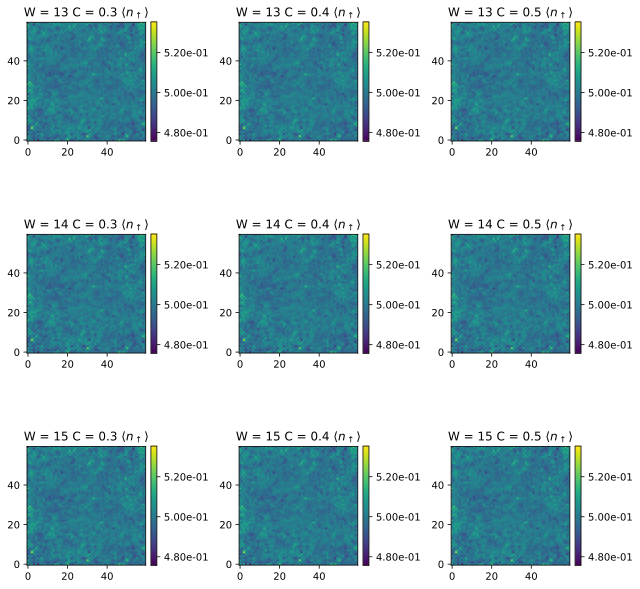

In [26]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
for i, w in enumerate([13, 14, 15]):
    for j, c in enumerate([0.3, 0.4, 0.5]):
        densities = get_final_densities(GR_GRstar, totalbins)
        n_up = densities[0]
        ax = axes[i, j]
        ax.set_title(f"W = {w} C = {c} " + r"$\langle n_{\uparrow} \rangle$")
        mappable = ax.imshow(n_up, origin="lower")
        fig.colorbar(mappable, ax=ax, **colorbar_kwargs)
fig.tight_layout()